In [1]:
import os
import pandas as pd

In [2]:
new_dir = "E:\Code\深度学习\DAT565E\Final Project"
os.chdir(new_dir)

In [3]:
df = pd.read_csv('data.csv', index_col=None)

In [4]:
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [6]:
print(df['satisfaction'].value_counts())

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


In [7]:
obj_col = df.select_dtypes(include=['object']).columns
print("Data object columns:", obj_col)

Data object columns: Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [8]:
# see the categorical features composition and numbers
obj_col_list = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in obj_col_list:
    print(df[col].value_counts())
    print()

Female    65899
Male      63981
Name: Gender, dtype: int64

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64



In [9]:
# Label encoding 'Gender' and 'satisfaction'
from sklearn.preprocessing import LabelEncoder
label_encode_features = ['Gender', 'satisfaction']
le = LabelEncoder()
for feature in label_encode_features:
    df[feature] = le.fit_transform(df[feature])

# one-hot encoding 'Customer Type', 'Type of Travel', 'Class'
one_hot_features = ['Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=one_hot_features)

Data Cleaning & Feature Engineering

In [10]:
# null values
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

Arrival Delay in Minutes    393
dtype: int64


In [11]:
# fill null value with median
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)
# check null value again
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

Series([], dtype: int64)


In [12]:
# 1. 'Unnamed 0' and 'id' is not wanted
df = df.drop(columns=['Unnamed: 0', 'id'], axis=1)

In [13]:
df.head()

Gender  Age  Flight Distance  Inflight wifi service  \
0       1   13              460                      3   
1       1   25              235                      3   
2       0   26             1142                      2   
3       0   25              562                      2   
4       1   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  ...  \
0               5                3             5  ...   
1               1                3             1  ...   
2               5                5             5  ...   
3               2                2             2  ...   
4               4                5             5  ...   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                          25                      18.0             0   
1                           1                       6.0             0   
2                           0                       0.0             1   
3                          11                       9.0             0   
4                           0                       0.0             1   

   Customer Type_Loyal Customer  Customer Type_disloyal Customer  \
0                             1                                0   
1                             0                                1   
2                             1                                0   
3                             1                                0   
4                             1                                0   

   Type of Travel_Business travel  Type of Travel_Personal Travel  \
0                               0                               1   
1                               1                               0   
2                               1                               0   
3                               1                               0   
4                               1                               0   

   Class_Business  Class_Eco  Class_Eco Plus  
0               0          0               1  
1               1          0               0  
2               1          0               0  
3               1          0               0  
4               1          0               0  

[5 rows x 27 columns]

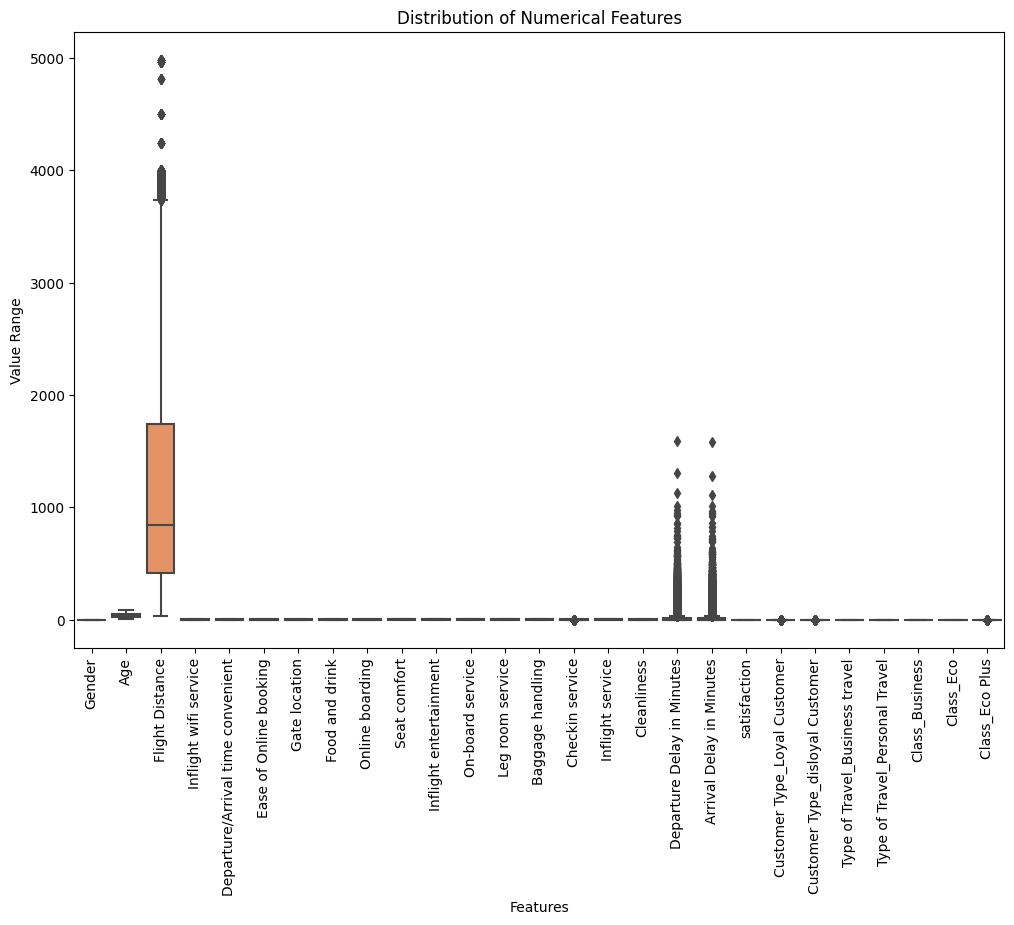

In [14]:
# 2. Presenting the data dimension for each feature
import seaborn as sns
import matplotlib.pyplot as plt

all_features = df.columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[all_features])
plt.xticks(rotation=90)
plt.title('Distribution of Numerical Features')
plt.ylabel('Value Range')
plt.xlabel('Features')
plt.show()

In [15]:
# Scaling the 4 wide dimension features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = scaler.fit_transform(df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']])

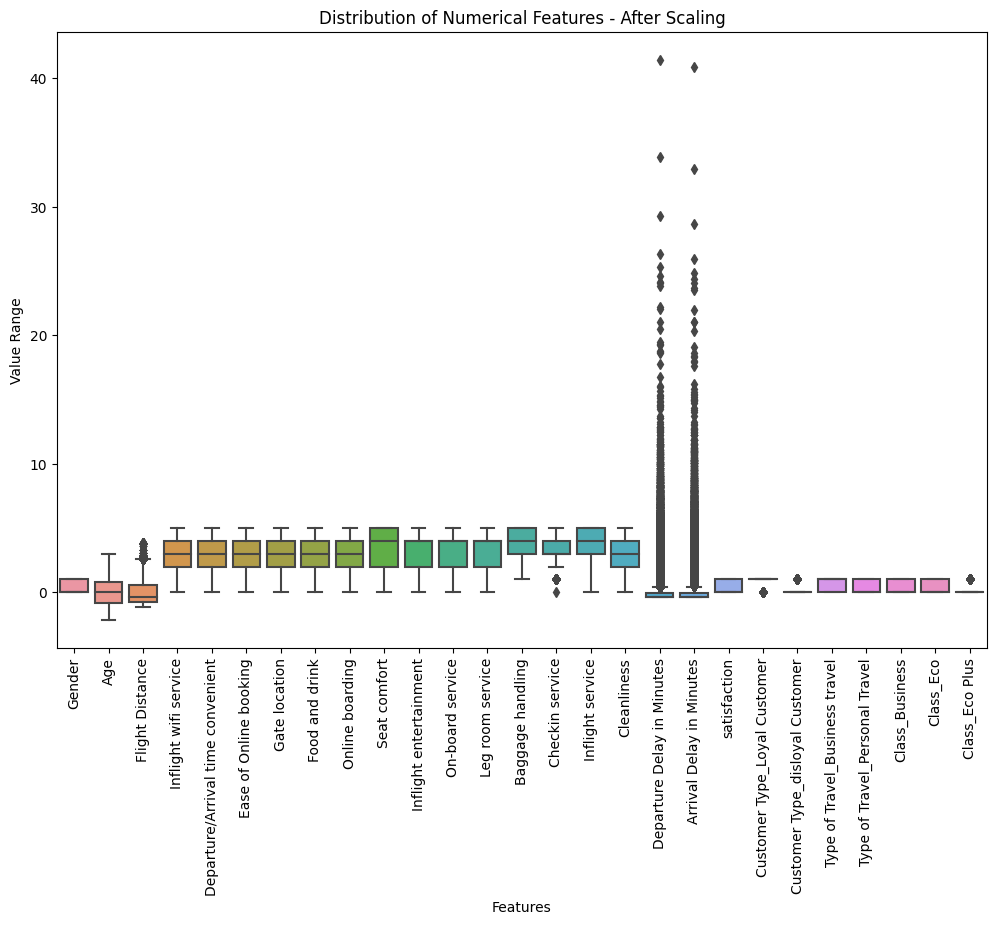

In [16]:
# Re-presenting
# 2. Presenting the data dimension for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[all_features])
plt.xticks(rotation=90)
plt.title('Distribution of Numerical Features - After Scaling')
plt.ylabel('Value Range')
plt.xlabel('Features')
plt.show()

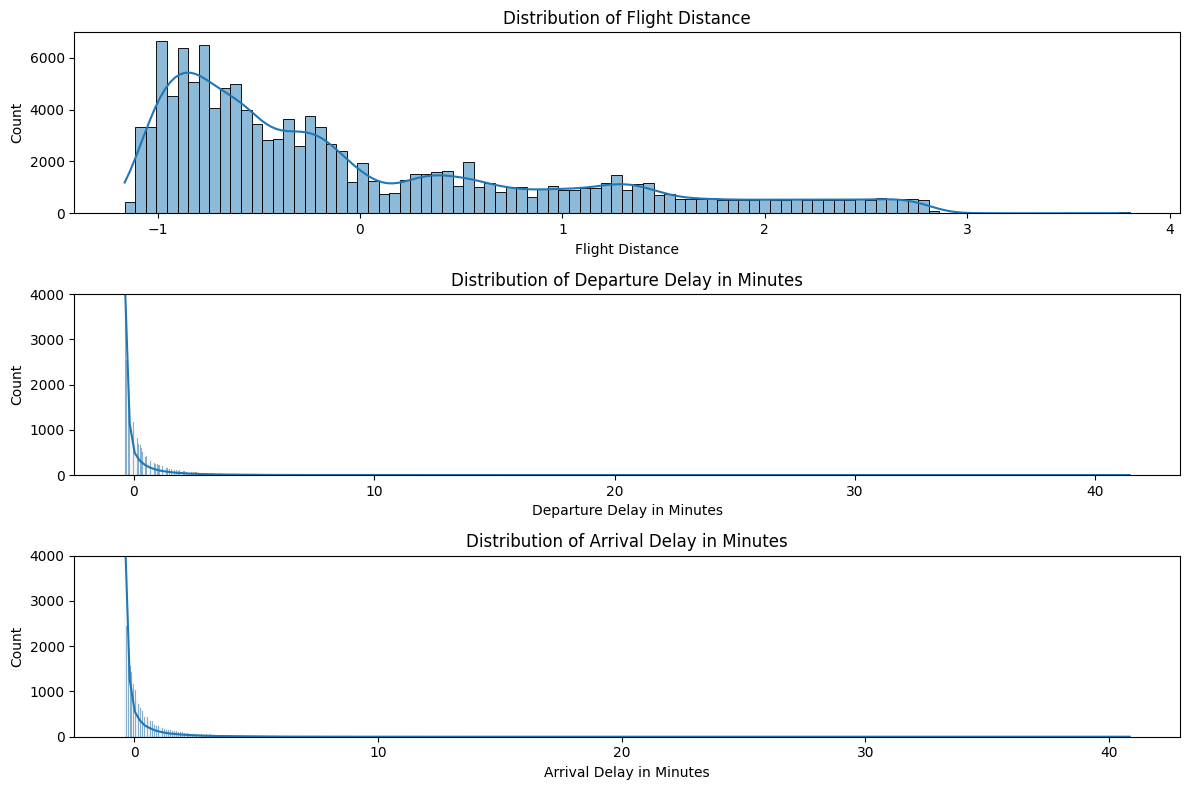

In [17]:
# 3. Visualization: Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes
max_dep_delay = df['Departure Delay in Minutes'].max()
max_arr_delay = df['Arrival Delay in Minutes'].max()

# Flight distance
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
sns.histplot(df['Flight Distance'], kde=True)
plt.title('Distribution of Flight Distance')\

# Departure Delay in Minutes
plt.subplot(3, 1, 2)
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.ylim(0, 4000)
plt.title('Distribution of Departure Delay in Minutes')

# Arrival Delay in Minutes
plt.subplot(3, 1, 3)
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.ylim(0, 4000)
plt.title('Distribution of Arrival Delay in Minutes')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.shape, test.shape

((103904, 27), (25976, 27))

In [19]:
X_train = train.drop(columns=['satisfaction'], axis=1)
y_train = train['satisfaction']
X_test = test.drop(columns=['satisfaction'], axis=1)
y_test = test['satisfaction']

Applying Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.02))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_hist = model.fit(X_train,y_train,
                     epochs=60,
                     batch_size=24,
                     validation_data=(X_test, y_test),
                     callbacks=[early_stopping])

Epoch 1/60
4330/4330 [==============================] - 7s 2ms/step - loss: 0.2875 - accuracy: 0.8769 - val_loss: 0.1684 - val_accuracy: 0.9357
Epoch 2/60
4330/4330 [==============================] - 7s 2ms/step - loss: 0.1444 - accuracy: 0.9417 - val_loss: 0.1367 - val_accuracy: 0.9461
Epoch 3/60
4330/4330 [==============================] - 6s 1ms/step - loss: 0.1300 - accuracy: 0.9458 - val_loss: 0.1173 - val_accuracy: 0.9495
Epoch 4/60
4330/4330 [==============================] - 6s 1ms/step - loss: 0.1192 - accuracy: 0.9505 - val_loss: 0.1395 - val_accuracy: 0.9331
Epoch 5/60
4330/4330 [==============================] - 6s 1ms/step - loss: 0.1161 - accuracy: 0.9512 - val_loss: 0.1107 - val_accuracy: 0.9527
Epoch 6/60
4330/4330 [==============================] - 6s 1ms/step - loss: 0.1137 - accuracy: 0.9521 - val_loss: 0.1050 - val_accuracy: 0.9543
Epoch 7/60
4330/4330 [==============================] - 6s 2ms/step - loss: 0.1085 - accuracy: 0.9530 - val_loss: 0.1021 - val_accuracy:

In [62]:
y_pred_prob = model.predict(X_test)

In [63]:
# Evaluate the model
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
def evaluate_model(y_true, y_pred_prob):
    y_pred = np.round(y_pred_prob)

    # 1. print 3 metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # 2. conf matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # 3. ROC-AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    print(f"AUC: {auc:.4f}")

Precision: 0.9704
Recall: 0.9381
F1-score: 0.9540


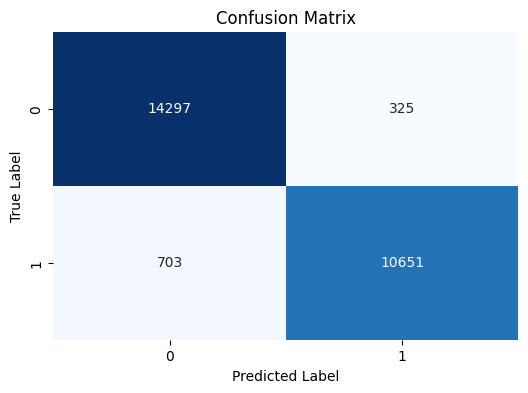

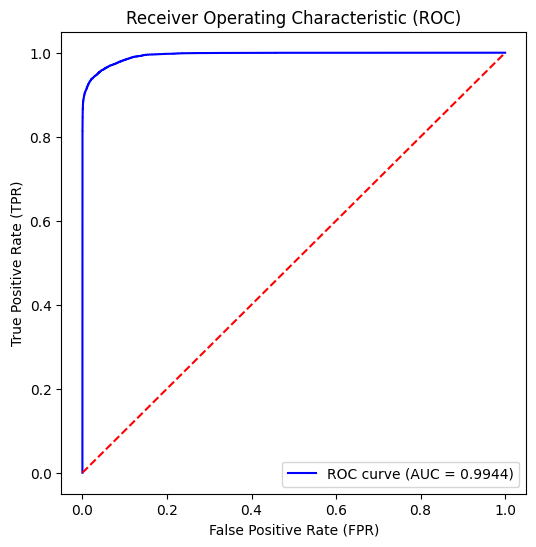

AUC: 0.9944


In [64]:
evaluate_model(y_test, y_pred_prob)

In [65]:
## Plot results
def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')  # "bo-" 蓝色点和实线
    plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')  # 蓝色实线
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro-', label='Training loss')  # "ro-" 红色点和实线
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')  # 红色实线
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

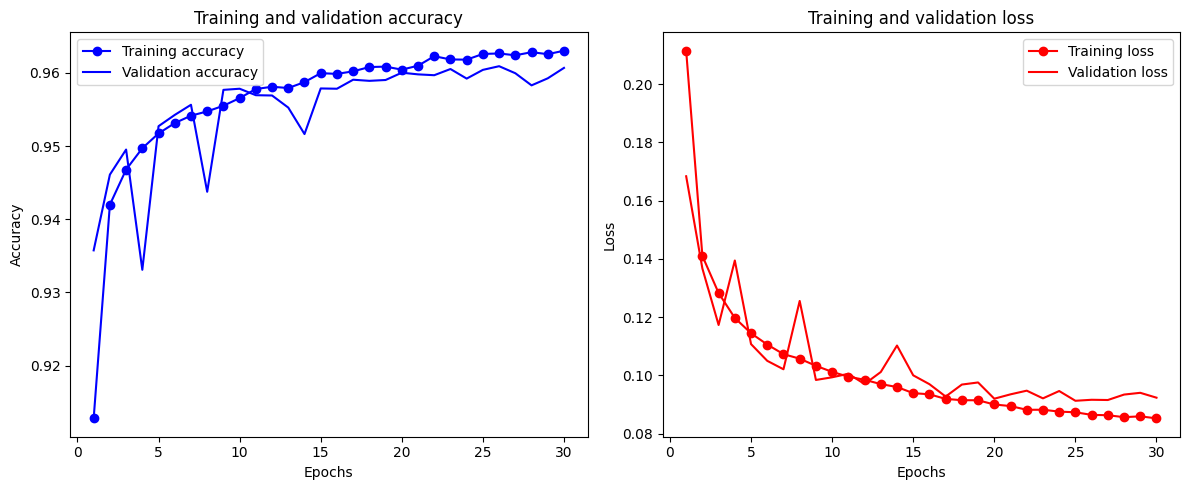

In [66]:
plotresults(model_hist)

Conv1D

In [76]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Flatten

# reshape
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

model_conv = Sequential()

model_conv.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_conv.add(GlobalMaxPooling1D())
model_conv.add(Dropout(0.02))
model_conv.add(Dense(64, activation='relu'))
model_conv.add(Dropout(0.01))
model_conv.add(Dense(32, activation='relu'))
model_conv.add(Dense(1, activation='sigmoid'))

model_conv.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model_hist_conv = model_conv.fit(X_train_reshaped, y_train, 
                                 epochs=40, 
                                 batch_size=32, 
                                 validation_data=(X_test_reshaped, y_test),callbacks=[early_stopping])

Epoch 1/40
3247/3247 [==============================] - 5s 2ms/step - loss: 0.4961 - accuracy: 0.7572 - val_loss: 0.3843 - val_accuracy: 0.8262
Epoch 2/40
3247/3247 [==============================] - 5s 1ms/step - loss: 0.3914 - accuracy: 0.8232 - val_loss: 0.3517 - val_accuracy: 0.8417
Epoch 3/40
3247/3247 [==============================] - 5s 2ms/step - loss: 0.3602 - accuracy: 0.8373 - val_loss: 0.3322 - val_accuracy: 0.8526
Epoch 4/40
3247/3247 [==============================] - 5s 2ms/step - loss: 0.3424 - accuracy: 0.8469 - val_loss: 0.3210 - val_accuracy: 0.8587
Epoch 5/40
3247/3247 [==============================] - 5s 2ms/step - loss: 0.3314 - accuracy: 0.8519 - val_loss: 0.3158 - val_accuracy: 0.8613
Epoch 6/40
3247/3247 [==============================] - 5s 1ms/step - loss: 0.3193 - accuracy: 0.8562 - val_loss: 0.3168 - val_accuracy: 0.8579
Epoch 7/40
3247/3247 [==============================] - 5s 2ms/step - loss: 0.3143 - accuracy: 0.8607 - val_loss: 0.3142 - val_accuracy:

In [77]:
y_pred_prob_conv = model_conv.predict(X_test_reshaped)

Precision: 0.8957
Recall: 0.8550
F1-score: 0.8749


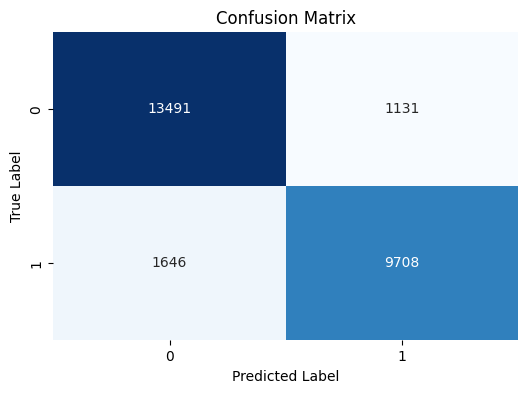

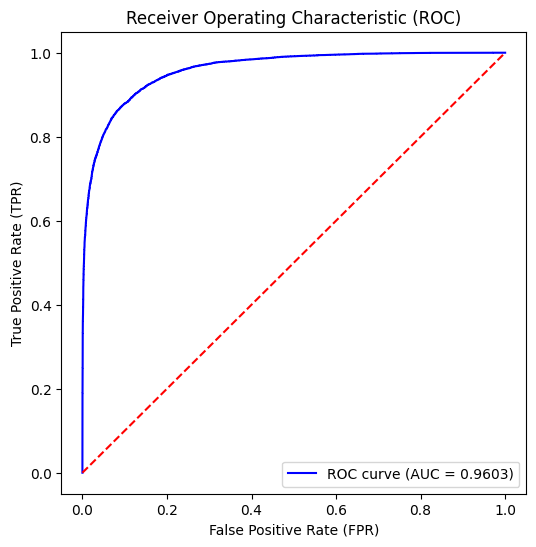

AUC: 0.9603


In [78]:
evaluate_model(y_test, y_pred_prob_conv)

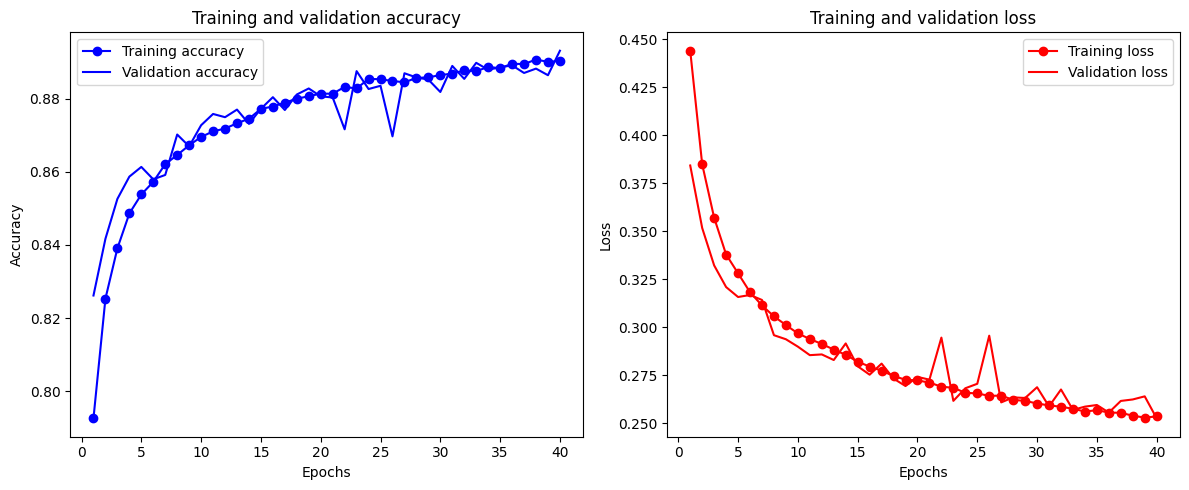

In [79]:
plotresults(model_hist_conv)

XGBoost

In [81]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [82]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                            use_label_encoder=False, 
                              eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

Precision: 0.9748
Recall: 0.9395
F1-score: 0.9568


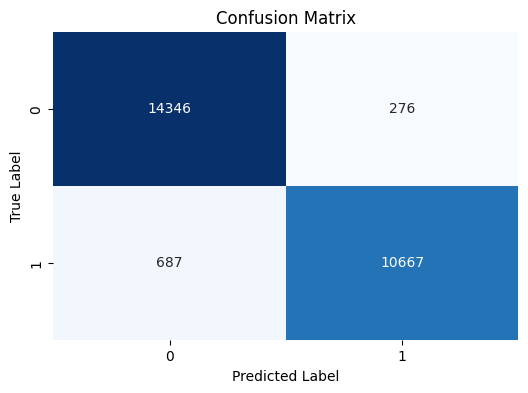

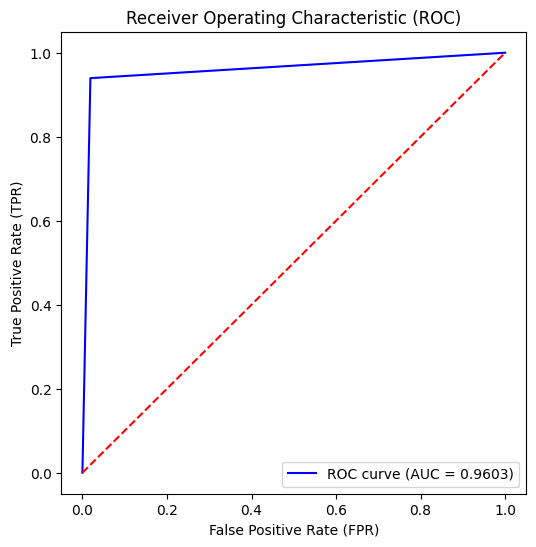

AUC: 0.9603


In [83]:
evaluate_model(y_test, y_pred_xgb)